In [1]:
import pandas as pd


In [2]:
data=pd.read_csv(" ")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

### Veiwing of data

In [5]:
testing_data=pd.read_csv('test.csv')
testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
dff=data.copy()

In [7]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### dropping non_required columns

In [8]:
data.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
testing_data.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)

In [11]:
testing_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


## plotting Countplot

No handles with labels found to put in legend.


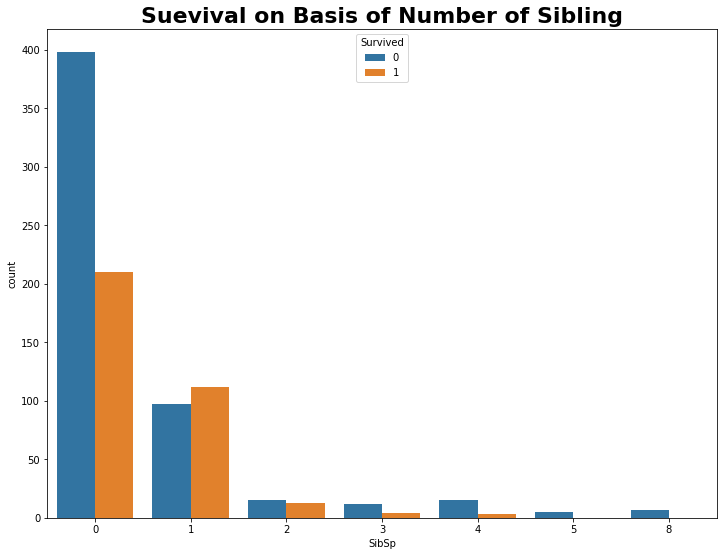

In [12]:
font = {
    'weight':'bold',
    'size': 22
}
plt.figure(figsize=(12,9))
plt.title('Suevival on Basis of Number of Sibling',fontdict=font)
plt.legend(loc='best')
sns.countplot(x='SibSp',hue='Survived',data=data)

No handles with labels found to put in legend.


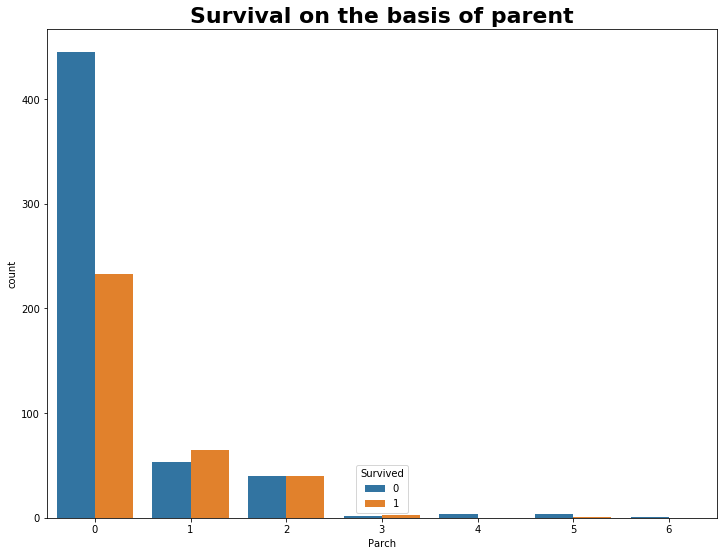

In [13]:
plt.figure(figsize=(12,9))
plt.title('Survival on the basis of parent',fontdict=font)
plt.legend(loc='best')
sns.countplot(x='Parch',hue='Survived',data=data)

In [14]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [15]:
testing_data.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S


## Data wrangling

In [16]:
data.Age=data.Age.fillna(data.Age.mean())

In [17]:
data.isnull().sum()
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool

In [18]:
testing_data.Age=testing_data.Age.fillna(data.Age.mean())
testing_data.Fare=testing_data.Fare.fillna(data.Fare.mean())

In [19]:
testing_data.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [20]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [21]:
testing_data.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S


## creating ddummies (done to convert categorical to continuous)

In [22]:
embark_d=pd.get_dummies(data.Embarked)
embark_t=pd.get_dummies(testing_data.Embarked)
sex_d=pd.get_dummies(data.Sex)
sex_t=pd.get_dummies(testing_data.Sex)

In [23]:
embark_t.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [24]:
data=pd.concat([data,embark_d,sex_d],axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


In [25]:
testing_data=pd.concat([testing_data,embark_t,sex_t],axis=1)
testing_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,892,3,male,34.5,0,0,7.8292,Q,0,1,0,0,1
1,893,3,female,47.0,1,0,7.0000,S,0,0,1,1,0
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,0,1
3,895,3,male,27.0,0,0,8.6625,S,0,0,1,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,1,1,0


In [26]:
data.drop(['Embarked','Sex'],axis=1,inplace=True)
testing_data.drop(['Embarked','Sex'],axis=1,inplace=True)

In [27]:
data.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0


In [28]:
testing_data.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,892,3,34.5,0,0,7.8292,0,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,1,0


In [29]:
data.shape[0]

891

In [30]:
X,Y=data.drop(['Survived'],axis=1),data['Survived']

## Creating testing And Trainig Data Set

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

### Creating @ Model one of KNN and Second of Decision Tree

In [32]:
model=KNeighborsClassifier(n_neighbors=6)
model2=DecisionTreeClassifier()

In [33]:
model.fit(x_train,y_train)
model2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
prediction=model.predict(x_test)
prediction2=model2.predict(x_test)

### Creating  Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
kconfusion = confusion_matrix(prediction,y_test)
dconfusion=confusion_matrix(prediction2,y_test)

In [38]:
kconfusion


array([[97, 54],
       [ 8, 20]], dtype=int64)

In [39]:
dconfusion

array([[86, 23],
       [19, 51]], dtype=int64)

### Checking the acuuracy

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
score=round(accuracy_score(prediction,y_test)*100,2)
score

65.36

In [43]:
score1=round(accuracy_score(prediction2,y_test)*100,2)
score1

76.54

In [44]:
sub1=model2.predict(testing_data)

In [45]:
submission_file1 = pd.DataFrame({'PassengerId': testing_data['PassengerId'], 'Survived': sub1})
submission_file1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [46]:
submission_file1.to_csv("DecisionSubmission.csv")

## ANOTHER APPROACH

In [47]:
df=pd.read_csv("titanic_data.csv")

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df['Family']=df['SibSp']+df['Parch']

In [50]:
df.drop(['SibSp','Parch','Cabin'],axis=1,inplace=True)

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [52]:
df=pd.concat([df,embark_d,sex_d],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0,0,1,0,1


In [53]:

df.drop(['Embarked','Sex'],axis=1,inplace=True)
df.head(2)

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Family,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,1,0,0,1,0


In [54]:
df.Age=df.Age.fillna(df.Age.mean())
testing_data.Fare=testing_data.Fare.fillna(data.Fare.mean())

In [55]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Family,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,0,0,1,1,0


### Not Considering Name And Ticket

In [56]:
df.drop(['Name','Ticket'],axis=1,inplace=True)
df.head(3)

,PassengerId,Survived,Pclass,Age,Fare,Family,C,Q,S,female,male
0,1,0,3,22.0,7.2500,1,0,0,1,0,1
1,2,1,1,38.0,71.2833,1,1,0,0,1,0
2,3,1,3,26.0,7.9250,0,0,0,1,1,0


In [57]:
testing_data['Family']=testing_data['SibSp']+testing_data['Parch']

In [58]:
testing_data.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Family
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,1


In [59]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,Family,C,Q,S,female,male
0,1,0,3,22.0,7.2500,1,0,0,1,0,1
1,2,1,1,38.0,71.2833,1,1,0,0,1,0
2,3,1,3,26.0,7.9250,0,0,0,1,1,0
3,4,1,1,35.0,53.1000,1,0,0,1,1,0
4,5,0,3,35.0,8.0500,0,0,0,1,0,1


In [60]:
X,Y=df.drop(['Survived'],axis=1),df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [61]:

model=KNeighborsClassifier(n_neighbors=6)

model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [62]:
testing_data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [63]:
new_prediction=model.predict(testing_data)

In [64]:
submission_file1 = pd.DataFrame({'PassengerId': testing_data['PassengerId'], 'Survived': new_prediction})
submission_file1.head()

submission_file1.to_csv('KnnSubmission.csv')


In [65]:
score=round(accuracy_score(prediction,y_test)*100,2)
score

65.36

In [66]:
accuracy=data[(data.female==1)]
accuracy.shape[0]

314